In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
import rpy2.robjects as robjects

from rpy2.robjects.packages import importr
%load_ext rpy2.ipython



ImportError: dlopen(/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so, 0x0002): Library not loaded: @rpath/libffi.7.dylib
  Referenced from: /opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so
  Reason: tried: '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/../../libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/../../libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/bin/../lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/bin/../lib/libffi.7.dylib' (no such file), '/usr/local/lib/libffi.7.dylib' (no such file), '/usr/lib/libffi.7.dylib' (no such file)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
import rpy2.robjects as robjects



ImportError: dlopen(/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so, 0x0002): Library not loaded: @rpath/libffi.7.dylib
  Referenced from: /opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so
  Reason: tried: '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/../../libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/lib/python3.8/site-packages/../../libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/bin/../lib/libffi.7.dylib' (no such file), '/opt/anaconda3/envs/spyder_env/bin/../lib/libffi.7.dylib' (no such file), '/usr/local/lib/libffi.7.dylib' (no such file), '/usr/lib/libffi.7.dylib' (no such file)

In [22]:
df = pd.read_pickle('data/prop_data_gap_12_2_1_05_ct_NEST.pkl').drop_duplicates()

In [23]:
# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'DIA'

time_win = 2 #h
max_gap = 10 #s

df_filt = df.loc[(df.time_win==3600 * time_win) & 
                 (df.max_gap==max_gap) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
df_filt = df_filt.sort_values(['rep','h'])

rep_to_colony = {i: i for i in range(57)}
#df_filt.insert(5, 'colony', [rep_to_colony[j] for j in df_filt.rep])

# Export dataframe for stats
df_filt.to_csv('NTM_df_stats.csv')
df_filt


rep   exp                start time_win   h max_gap  CC ants partition  \
211   16  DIAa  2021-09-15 09:00:00     7200   9      10  25  177         6   
242   16  DIAb  2021-09-13 09:00:00     7200   9      10  19  184         6   
212   16  DIAa  2021-09-15 11:00:00     7200  11      10  25  177         8   
243   16  DIAb  2021-09-13 11:00:00     7200  11      10  22  184         5   
213   16  DIAa  2021-09-15 13:00:00     7200  13      10  24  177         7   
...   ..   ...                  ...      ...  ..     ...  ..  ...       ...   
2477  53  DIAb  2021-12-17 15:00:00     7200  15      10  12  165         5   
2447  53  DIAa  2021-12-19 17:00:00     7200  17      10   9  164         6   
2478  53  DIAb  2021-12-17 17:00:00     7200  17      10   7  165         5   
2448  53  DIAa  2021-12-19 19:00:00     7200  19      10   6  164         5   
2479  53  DIAb  2021-12-17 19:00:00     7200  19      10  11  165         6   

           MOD       DEN      wDEN DIA      wDIA RAD      wRAD        DEH  \
211   0.338874  0.514018  0.003843   4  5.015169   2       3.0  35.325692   
242    0.53724  0.336692  0.003741   5  1.958573   3       1.2  31.591997   
212   0.361164  0.449174  0.003619   4  1.451373   2       1.0   31.71817   
243   0.413516  0.385897  0.003687   4  3.835064   3       3.0  31.732269   
213   0.440986  0.362957  0.003303   4  2.426591   2  1.217192  30.128333   
...        ...       ...       ...  ..       ...  ..       ...        ...   
2477  0.416639  0.545794  0.005988   3  0.912137   2      0.75  29.531899   
2447  0.413537  0.589495  0.005681   3   0.34448   2  0.181818  32.939186   
2478  0.438883  0.488337  0.006228   4  0.815871   2  0.666667  31.590448   
2448  0.414789  0.611814  0.006028   3  0.158208   2  0.080322  32.048443   
2479  0.423652  0.521408  0.006707   3  0.293022   2  0.150667  30.945358   

             wDEH       CLS  
211   3858.981626   0.00719  
242   4475.669993  0.007292  
212   3943.732943  0.007229  
243   4127.040769    0.0088  
213   3737.614572   0.00979  
...           ...       ...  
2477  4552.745997  0.007623  
2447  4009.483296  0.009822  
2478  4678.545433  0.010144  
2448  3855.745739   0.00982  
2479  4737.726405    0.0104  

[132 rows x 19 columns]

In [24]:
%%R -i time_win -o prop_list -o pv_adj 

# -----------------------------
# Linear Mixed Effects Model (R)
# -----------------------------
rm(list=ls())
library(lme4)
library(car)

prop_list <- c('MOD','wDIA','wDEH','wDEN')
dat <- read.csv("NTM_df_stats.csv",header=T,stringsAsFactors = F)
  # list of properties for the LMER test
pv_list <- integer(0)

print(dat$head)
if (dat$time_win[1] == 12*3600){rf = ' ~ exp +(1|rep)'}
    else{rf = ' ~ exp +(1|rep)+(1|h)'}

for (prop in prop_list){
    model <- lmer(formula(paste(prop,rf)), data = dat)
    print(summary(model))
    pv_list <- c(pv_list, print(as.numeric(Anova(model)["exp","Pr(>Chisq)"])))
}

pv_adj <- p.adjust(pv_list, method="BH")
names(pv_adj) <- prop_list

print(pv_adj)

UsageError: Cell magic `%%R` not found.


In [93]:
pv_dict = {prop_list[i]: pv_adj[i] for i in range(len(pv_adj))}
pv_dict

{'MOD': 0.7898540597476782,
 'wDIA': 0.05928559354668137,
 'wDEH': 0.0009824136303680506,
 'wDEN': 0.7898540597476782}

/tmp/ipykernel_5468/3052687015.py:32: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  stat_sign = '*' + (pv_dict[p]<=0.01)*'*' + (pv_dict[p]<=0.001)*'*' + (pv_dict[p]<=0.0001)*'*'


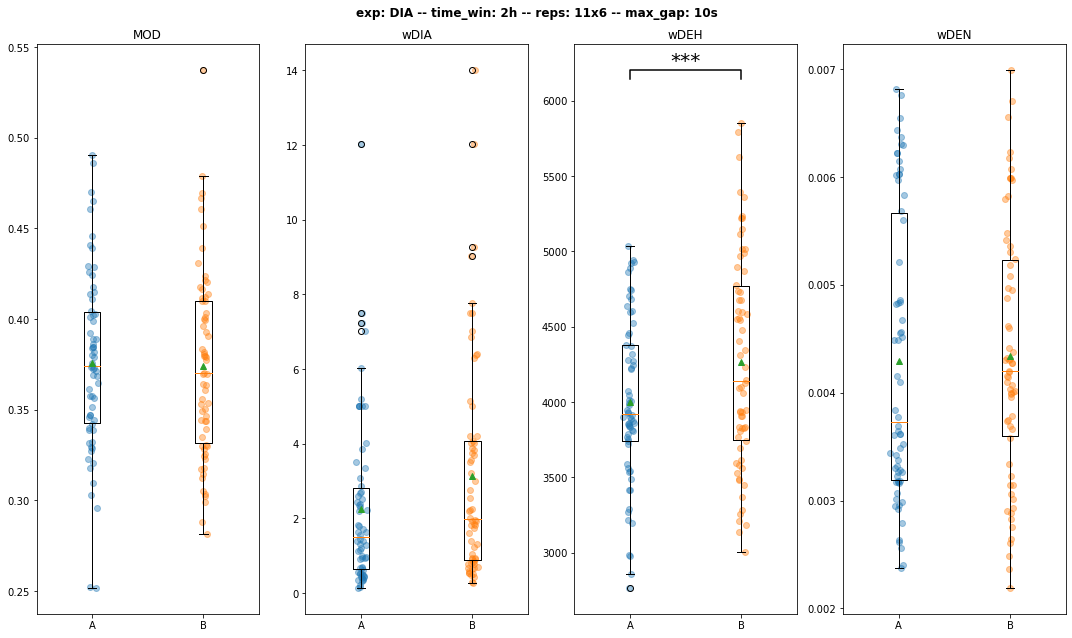

In [94]:
# Raw data specific property
fig, axs = plt.subplots(1, len(prop_list))

for idx_p, p in enumerate(prop_list):

    # dataframe for a-b comparison
    df_ab = pd.DataFrame()
    df_ab.insert(0, 'A', list(df_filt[p].iloc[::2]))
    df_ab.insert(1, 'B', list(df_filt[p].iloc[1::2]))
    df_ab


    # Plotting
    vals, names, xs = [],[],[]
    for i, col in enumerate(df_ab.columns):
        vals.append(df_ab[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.02, df_ab[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


    box_plot = axs[idx_p].boxplot(vals, labels=names, showmeans=True)
    for x, val in zip(xs, vals):
        axs[idx_p].scatter(x, val, alpha=0.4)

    means = df_ab.mean()
    stds =  df_ab.std()
    
    axs[idx_p].set_title(p)
    
    # statistical annotation
    if pv_dict[p]<=0.05:
        stat_sign = '*' + (pv_dict[p]<=0.01)*'*' + (pv_dict[p]<=0.001)*'*' + (pv_dict[p]<=0.0001)*'*'
        x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        mm =np.max(df_ab.max())
        y, h, col = 1.05*mm, 0.01*mm, 'k'
        axs[idx_p].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        axs[idx_p].text((x1+x2)*.5, y+h, stat_sign, ha='center', va='bottom', color=col, fontsize=20)

fig = plt.suptitle('exp: ' + exp + 
                    ' -- time_win: ' + str(time_win) + 'h'
                    ' -- reps: ' + str(int(len(df_ab)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                    ' -- max_gap: ' + str(max_gap) + 's',
                   fontweight="bold")
plt.tight_layout()
plt.show()

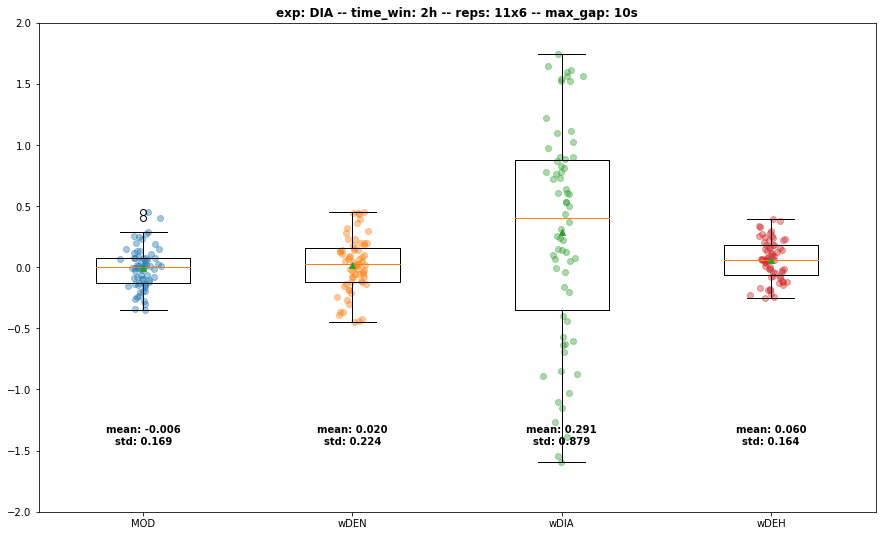

In [9]:
#===== RELATIVE DIFFERENCE =====


# ---- dataframe of relative difference---- 
p = ['MOD', 'wDEN', 'wDIA', 'wDEH']
df_rd = (df_filt[p].diff()/df_filt[p].rolling(2).mean()).iloc[1::2]
df_rd.insert(0,'rep', df_filt.rep.iloc[1::2])
df_rd.insert(1,'exp', [a[0:3] for a in df_filt.exp.iloc[1::2]])
df_rd.insert(3,'start-b', list(df_filt.start.iloc[1::2]))

vals, names, xs = [],[],[]
for i, col in enumerate(df_rd[p].columns):
    vals.append(df_rd[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_rd[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure()
box_plot = plt.boxplot(vals, labels=names, showmeans=True)
for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4)

means = df_rd[p].mean()
stds =  df_rd[p].std()

for xtick in range(len(p)):
    plt.text(xtick+1,-1.35, 'mean: {:.3f}'.format(means[xtick]), 
              horizontalalignment='center',size='medium',color='k',weight='semibold')
    plt.text(xtick+1,-1.45, 'std: {:.3f}'.format(stds[xtick]), 
                  horizontalalignment='center',size='medium',color='k',weight='semibold')

plt.ylim([-2,2])
fig = plt.title('exp: ' + exp + 
                ' -- time_win: ' + str(time_win) + 'h'
                ' -- reps: ' + str(int(len(df_rd)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                ' -- max_gap: ' + str(max_gap) + 's',
               fontweight="bold")